<a href="https://colab.research.google.com/github/nicklausnathanieltiu23p76078-wq/PythonforDataScienceandAI_FinalProject_Group16/blob/main/Original_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers datasets evaluate scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model_name = "jaranohaal/distilbert-base-uncased-finetuned-fake-news"
dataset_name = "GonzaloA/fake_news"

In [ ]:
dataset = load_dataset(dataset_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/38.8M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/13.0M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/13.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24353 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8117 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8117 [00:00<?, ? examples/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
def preprocess(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=256)

tokenized_test = dataset["test"].map(preprocess, batched=True)

Map:   0%|          | 0/8117 [00:00<?, ? examples/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
eval_trainer = Trainer(model=model)
predictions_output = eval_trainer.predict(tokenized_test)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nicklausnathanieltiu23p76078 (nicklausnathanieltiu23p76078-school) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
y_preds = np.argmax(predictions_output.predictions, axis=1)
y_true = predictions_output.label_ids

# Original Model Accuracy

In [ ]:
acc = accuracy_score(y_true, y_preds)
print(f"\n ORIGINAL MODEL ACCURACY: {acc * 100:.2f}%")


 ORIGINAL MODEL ACCURACY: 98.71%


# Original Model Confusion Matrix

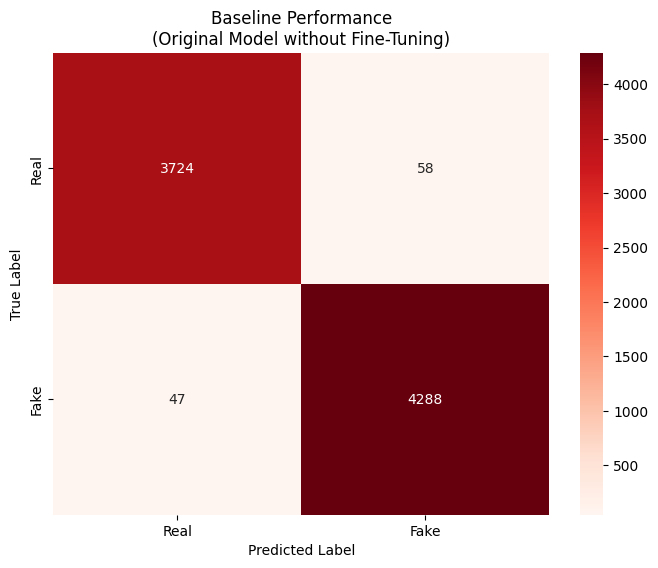

In [ ]:
cm = confusion_matrix(y_true, y_preds)
labels = ['Real', 'Fake']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Baseline Performance\n(Original Model without Fine-Tuning)')
plt.show()

# Detailed Report

In [ ]:
print(classification_report(y_true, y_preds, target_names=labels))

              precision    recall  f1-score   support

        Real       0.99      0.98      0.99      3782
        Fake       0.99      0.99      0.99      4335

    accuracy                           0.99      8117
   macro avg       0.99      0.99      0.99      8117
weighted avg       0.99      0.99      0.99      8117

